In [2]:
from src.data.save_tar_gz import tar_gz_to_csv
from src.data.load_data import load_data_from_csv
from src.utils.data_utils import *
from src.data.additional_data import *
import warnings
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import src.data.wrangling as wrangling

In [45]:
Ratebeer_path = lambda path: f"{path}/Ratebeer"
BeerAdvocate_path = lambda path: f"{path}/BeerAdvocate"
Matched_path = lambda path: f"{path}/MatchedBeerData"
path = "data/raw"

Ratebeer_file = lambda file: f"{Ratebeer_path(path)}/{file}"
BeerAdvocate_file = lambda file: f"{BeerAdvocate_path(path)}/{file}"
Matched_file = lambda file: f"{Matched_path(path)}/{file}"

In [46]:
ba_ratings_df = pd.read_csv(BeerAdvocate_file("BeerAdvocate_ratings.csv"))

In [47]:
ba_ratings_df = ba_ratings_df.drop_duplicates()
nb_ratings = len(ba_ratings_df)
print(f"Nbr ratings: {nb_ratings}")

Nbr ratings: 8393032


In [48]:
popular_beers = ba_ratings_df.groupby("beer_id")
popular_beers.head()

,Unnamed: 0,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,0,R\xc3\xa9gab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True
1,1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True
2,2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True
3,3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True
4,4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393027,8393027,K\xc3\xb6lsch Ale,19139,Summit Station Restaurant & Brewery,885,K\xc3\xb6lsch,5.0,1141038000,jaluria,jaluria.31362,3.50,3.50,3.50,4.00,4.0,3.80,I'll start off reviewing this beer with the fo...,True
8393028,8393028,K\xc3\xb6lsch Ale,19139,Summit Station Restaurant & Brewery,885,K\xc3\xb6lsch,5.0,1140346800,Dithyramb,dithyramb.4413,3.00,3.00,3.00,2.50,3.0,2.80,Served on draft at the pub. Poured a clear yel...,True
8393029,8393029,K\xc3\xb6lsch Ale,19139,Summit Station Restaurant & Brewery,885,K\xc3\xb6lsch,5.0,1092132000,ManekiNeko,manekineko.2654,3.00,1.50,1.00,1.50,1.5,1.54,Served on tap at the brewpub in a pint glass.A...,True
8393030,8393030,Nut Brown Ale,19140,Summit Station Restaurant & Brewery,885,English Brown Ale,5.3,1341741600,Redsox1539,redsox1539.683632,NaN,NaN,NaN,NaN,NaN,3.50,NaN,False


In [49]:
popular_beers = popular_beers["beer_id"].count().sort_values(ascending=False)
popular_beers_df = popular_beers.reset_index(name='nbr_reviews')
print(popular_beers_df.head())

   beer_id  nbr_reviews
0    11757        16509
1     2093        15548
2     7971        14436
3     1093        14305
4    29619        13835


In [50]:
for quant in range(1, 20):
    quant_reviews = popular_beers_df["nbr_reviews"].quantile(quant/20.)
    print(f"Nbr ratings for quantile {quant/20.}: {quant_reviews}")

Nbr ratings for quantile 0.05: 1.0
Nbr ratings for quantile 0.1: 1.0
Nbr ratings for quantile 0.15: 1.0
Nbr ratings for quantile 0.2: 1.0
Nbr ratings for quantile 0.25: 1.0
Nbr ratings for quantile 0.3: 1.0
Nbr ratings for quantile 0.35: 2.0
Nbr ratings for quantile 0.4: 2.0
Nbr ratings for quantile 0.45: 2.0
Nbr ratings for quantile 0.5: 3.0
Nbr ratings for quantile 0.55: 3.0
Nbr ratings for quantile 0.6: 4.0
Nbr ratings for quantile 0.65: 5.0
Nbr ratings for quantile 0.7: 7.0
Nbr ratings for quantile 0.75: 9.0
Nbr ratings for quantile 0.8: 13.0
Nbr ratings for quantile 0.85: 21.0
Nbr ratings for quantile 0.9: 37.0
Nbr ratings for quantile 0.95: 93.0


In [51]:
review_thresh = 100

og_len = len(popular_beers_df)
filtered_beers_names = popular_beers_df[popular_beers_df["nbr_reviews"] > review_thresh]
removed_beers_count = og_len - len(filtered_beers_names)
print(f"Number of beers removed: {removed_beers_count}, {removed_beers_count/og_len*100}%")

Number of beers removed: 236234, 95.26255937930979%


In [52]:
filtered_beers = ba_ratings_df.where(ba_ratings_df["beer_id"].isin(filtered_beers_names["beer_id"])).groupby("beer_id")
filtered_beers.head()

,Unnamed: 0,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
154,154.0,Caffrey's Irish Ale,825.0,Thomas Caffrey Brewing Co.,297.0,Irish Red Ale,3.8,1.500113e+09,GregKobeArntz24,gregkobearntz24.1206160,4.50,4.75,4.25,4.50,4.50,4.54,NaN,False
155,155.0,Caffrey's Irish Ale,825.0,Thomas Caffrey Brewing Co.,297.0,Irish Red Ale,3.8,1.483182e+09,awjess,awjess.1185716,4.50,4.00,4.25,4.00,4.25,4.11,"Look - Has a nice foamy head, Feel - Creamy ...",False
156,156.0,Caffrey's Irish Ale,825.0,Thomas Caffrey Brewing Co.,297.0,Irish Red Ale,3.8,1.468318e+09,fr0wn3r,fr0wn3r.862994,3.00,3.25,3.00,3.00,3.00,3.06,NaN,False
157,157.0,Caffrey's Irish Ale,825.0,Thomas Caffrey Brewing Co.,297.0,Irish Red Ale,3.8,1.459418e+09,Fatehunter,fatehunter.326927,4.00,3.25,4.00,3.50,3.50,3.52,Pours a finger of head on a hazy darker straw ...,True
158,158.0,Caffrey's Irish Ale,825.0,Thomas Caffrey Brewing Co.,297.0,Irish Red Ale,3.8,1.450264e+09,MTLDOG,mtldog.920333,4.50,3.75,4.00,3.00,3.75,3.52,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392330,8392330.0,Chaotic Double IPA,70471.0,Twisted Manzanita Ales,23640.0,American Double / Imperial IPA,10.1,1.469786e+09,jmdrpi,jmdrpi.276070,3.50,4.00,4.00,4.25,4.00,4.07,12 oz can into glassClear dark golden in color...,True
8392331,8392331.0,Chaotic Double IPA,70471.0,Twisted Manzanita Ales,23640.0,American Double / Imperial IPA,10.1,1.469095e+09,Tone,tone.106332,4.50,4.00,4.25,4.00,4.00,4.06,"Pours a hazy, copper color. 1/2 inch head of ...",True
8392332,8392332.0,Chaotic Double IPA,70471.0,Twisted Manzanita Ales,23640.0,American Double / Imperial IPA,10.1,1.466935e+09,Donkster46,donkster46.836463,3.75,3.00,3.25,3.25,3.25,3.22,NaN,False
8392333,8392333.0,Chaotic Double IPA,70471.0,Twisted Manzanita Ales,23640.0,American Double / Imperial IPA,10.1,1.461060e+09,AngEo,angeo.885735,3.50,3.75,3.50,3.75,3.50,3.66,NaN,False


In [53]:
ba_beers = pd.read_csv(BeerAdvocate_file("BeerAdvocate_beers.csv"))
ba_beers.head()

,Unnamed: 0,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [55]:
# Calculate the mean and standard deviation of the ratings for each beer
beer_stats = filtered_beers["rating"].agg(['mean', 'std']).reset_index()

print(beer_stats.head())

# Rename the columns for clarity
beer_stats.columns = ['beer_id', 'mean_rating', 'std_rating']

# Merge the statistics back into the filtered beers dataframe
filtered_beers_df = pd.merge(ba_beers, beer_stats, on='beer_id')


# Display the first few rows of the updated dataframe
filtered_beers_df.head()

   beer_id      mean       std
0      5.0  3.453768  0.565247
1      6.0  3.661320  0.497210
2      7.0  3.277643  0.651257
3      8.0  3.311286  0.593776
4      9.0  3.183991  0.554409


,Unnamed: 0,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,mean_rating,std_rating
0,33,825,Caffrey's Irish Ale,297,Thomas Caffrey Brewing Co.,Irish Red Ale,131,82,3.23,77.0,85.0,3.8,3.286260,NaN,0,NaN,3.286260,0.658600
1,673,3535,Thames Welsh ESB,1310,Felinfoel Brewery Co.,Extra Special / Strong Bitter (ESB),121,107,3.74,84.0,NaN,6.5,3.726364,-0.159765,107,3.710841,3.726364,0.482393
2,754,4720,Bitter & Twisted,323,Harviestoun Brewery Ltd.,English Pale Ale,447,277,3.74,84.0,NaN,4.2,3.710984,NaN,0,NaN,3.710984,0.475659
3,783,96705,Ola Dubh 1991,323,Harviestoun Brewery Ltd.,Old Ale,109,22,4.24,91.0,NaN,10.5,4.259908,0.635479,23,4.204783,4.259908,0.300069
4,784,41037,Ola Dubh Special Reserve 12,323,Harviestoun Brewery Ltd.,Old Ale,834,383,4.13,92.0,NaN,8.0,4.114868,NaN,0,NaN,4.114868,0.466393


In [ ]:
filtered_beers_df.sort_values(by="std_rating", ascending=False).head(30)

,Unnamed: 0,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,mean_rating,std_rating
733,36386,58507,Black Hole (Peat Whiskey Edition),13307,Mikkeller ApS,Russian Imperial Stout,171,97,2.84,70.0,NaN,13.10,2.826550,NaN,0,NaN,2.826550,1.143296
3938,112064,111,Samuel Adams Triple Bock,35,Boston Beer Company (Samuel Adams),American Strong Ale,953,651,2.95,69.0,93.0,17.50,2.958982,NaN,0,NaN,2.958982,1.121756
6169,149215,73862,Idiot's Drool,392,Weyerbacher Brewing Co.,Old Ale,136,47,2.59,67.0,NaN,12.00,2.601838,NaN,0,NaN,2.601838,1.096752
5515,136936,37389,Budweiser & Clamato Chelada,29,Anheuser-Busch,Fruit / Vegetable Beer,328,168,2.03,54.0,NaN,5.00,2.041921,NaN,0,NaN,2.041921,1.084926
658,33360,84897,My Blueberry Nightmare,16043,Birrificio Del Ducato,Fruit / Vegetable Beer,267,55,3.27,76.0,NaN,9.40,3.275805,-1.153262,72,3.177639,3.275805,1.054011
4495,120096,68882,The Concoction,45,Brooklyn Brewery,Herbed / Spiced Beer,167,78,3.19,76.0,NaN,7.60,3.037485,NaN,0,NaN,3.037485,1.024152
1982,76329,65997,Crime,43153,Arrogant Brewing,Chile Beer,515,116,3.26,75.0,NaN,9.60,2.945786,NaN,0,NaN,2.945786,1.011037
296,12788,99963,Modelo Especial Chelada,75,Grupo Modelo S.A. de C.V.,Fruit / Vegetable Beer,101,34,2.60,68.0,NaN,3.50,2.541188,NaN,0,NaN,2.541188,0.998797
5506,136908,37424,Bud Light & Clamato Chelada,29,Anheuser-Busch,Fruit / Vegetable Beer,405,152,1.78,49.0,NaN,4.20,1.833827,NaN,0,NaN,1.833827,0.987003
10571,251421,201732,Bourbon County Brand Barleywine (2015),1146,Goose Island Beer Co.,English Barleywine,235,52,3.62,82.0,NaN,12.90,3.842426,NaN,0,NaN,3.842426,0.978779


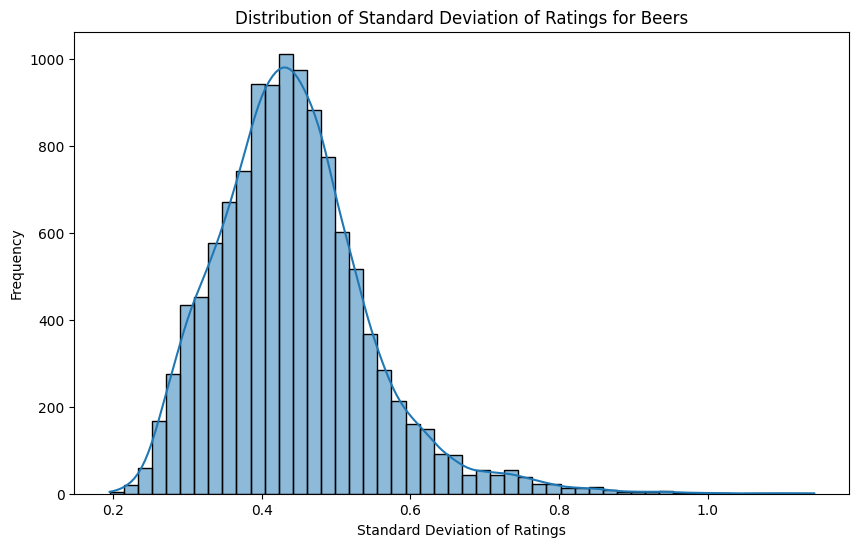

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(beer_stats['std_rating'], bins=50, kde=True)
plt.xlabel('Standard Deviation of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Standard Deviation of Ratings for Beers')
plt.show()

In [110]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = filtered_beers_df['std_rating'].quantile(0.25)
Q3 = filtered_beers_df['std_rating'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the beers that are outliers in regards to std of rating
outlier_beers_df = filtered_beers_df[(filtered_beers_df['std_rating'] < lower_bound) | (filtered_beers_df['std_rating'] > upper_bound)]
outlier_beers_df = outlier_beers_df.sort_values('std_rating', ascending=False)
outlier_beers_df.head(10)

,Unnamed: 0,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,mean_rating,std_rating
733,36386,58507,Black Hole (Peat Whiskey Edition),13307,Mikkeller ApS,Russian Imperial Stout,171,97,2.84,70.0,NaN,13.1,2.826550,NaN,0,NaN,2.826550,1.143296
3938,112064,111,Samuel Adams Triple Bock,35,Boston Beer Company (Samuel Adams),American Strong Ale,953,651,2.95,69.0,93.0,17.5,2.958982,NaN,0,NaN,2.958982,1.121756
6169,149215,73862,Idiot's Drool,392,Weyerbacher Brewing Co.,Old Ale,136,47,2.59,67.0,NaN,12.0,2.601838,NaN,0,NaN,2.601838,1.096752
5515,136936,37389,Budweiser & Clamato Chelada,29,Anheuser-Busch,Fruit / Vegetable Beer,328,168,2.03,54.0,NaN,5.0,2.041921,NaN,0,NaN,2.041921,1.084926
658,33360,84897,My Blueberry Nightmare,16043,Birrificio Del Ducato,Fruit / Vegetable Beer,267,55,3.27,76.0,NaN,9.4,3.275805,-1.153262,72,3.177639,3.275805,1.054011
4495,120096,68882,The Concoction,45,Brooklyn Brewery,Herbed / Spiced Beer,167,78,3.19,76.0,NaN,7.6,3.037485,NaN,0,NaN,3.037485,1.024152
1982,76329,65997,Crime,43153,Arrogant Brewing,Chile Beer,515,116,3.26,75.0,NaN,9.6,2.945786,NaN,0,NaN,2.945786,1.011037
296,12788,99963,Modelo Especial Chelada,75,Grupo Modelo S.A. de C.V.,Fruit / Vegetable Beer,101,34,2.60,68.0,NaN,3.5,2.541188,NaN,0,NaN,2.541188,0.998797
5506,136908,37424,Bud Light & Clamato Chelada,29,Anheuser-Busch,Fruit / Vegetable Beer,405,152,1.78,49.0,NaN,4.2,1.833827,NaN,0,NaN,1.833827,0.987003
10571,251421,201732,Bourbon County Brand Barleywine (2015),1146,Goose Island Beer Co.,English Barleywine,235,52,3.62,82.0,NaN,12.9,3.842426,NaN,0,NaN,3.842426,0.978779


In [108]:
brewery_81_outliers = outlier_beers_df[outlier_beers_df['brewery_id'] == 81]
brewery_81_outliers

,Unnamed: 0,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,mean_rating,std_rating
1211,58308,15804,Desperados,81,Heineken Nederland B.V.,American Pale Lager,256,61,2.37,61.0,55.0,6.0,2.366484,NaN,0,NaN,2.366484,0.830363
1210,58304,5636,Buckler Non-Alcoholic Brew,81,Heineken Nederland B.V.,Low Alcohol Beer,142,76,2.56,66.0,57.0,0.5,2.527042,NaN,0,NaN,2.527042,0.760154
1215,58320,22478,Heineken Premium Light Lager,81,Heineken Nederland B.V.,Light Lager,977,278,2.36,58.0,58.0,4.2,2.335763,NaN,0,NaN,2.335763,0.694601
1213,58317,246,Heineken Lager Beer,81,Heineken Nederland B.V.,Euro Pale Lager,4932,1381,2.75,65.0,68.0,5.0,2.716681,NaN,0,NaN,2.716681,0.692992
1214,58319,37570,Heineken Pilsener,81,Heineken Nederland B.V.,German Pilsener,224,23,2.93,71.0,NaN,5.0,2.757857,NaN,0,NaN,2.757857,0.682560


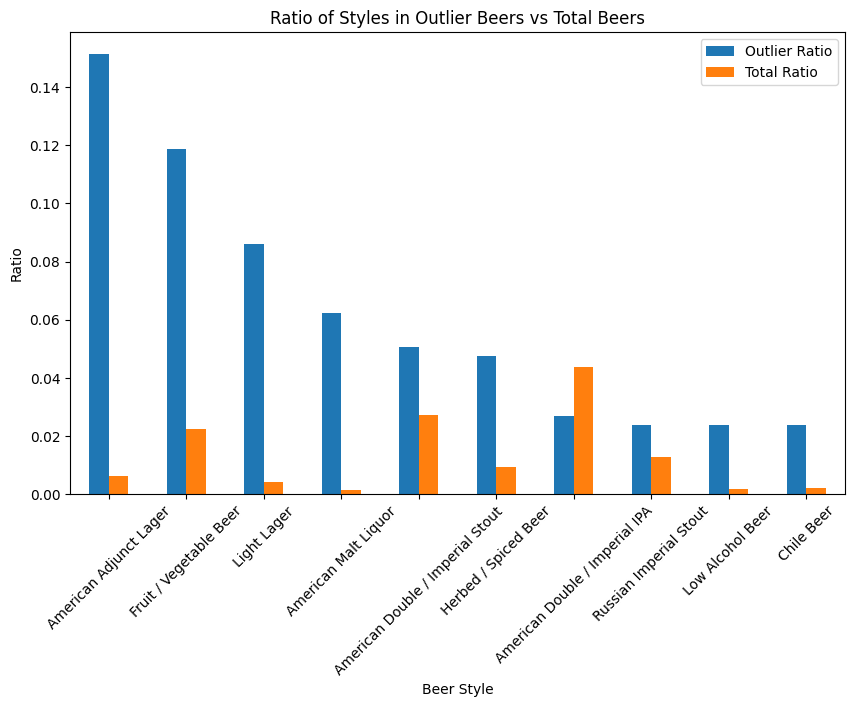

In [93]:
# Count the occurrences of each style in the outlier beers dataframe
outlier_style_counts = outlier_beers_df['style'].value_counts(normalize=True)

# Count the occurrences of each style in the total data
total_style_counts = ba_beers['style'].value_counts(normalize=True)

# Combine the two series into a dataframe
style_ratios = pd.DataFrame({
    'Outlier Ratio': outlier_style_counts,
    'Total Ratio': total_style_counts
}).fillna(0)

# Plot the ratios
style_ratios.sort_values('Outlier Ratio', ascending=False).head(10).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Beer Style')
plt.ylabel('Ratio')
plt.title('Ratio of Styles in Outlier Beers vs Total Beers')
plt.xticks(rotation=45)
plt.show()

top_10_most_repr = style_ratios.sort_values('Outlier Ratio', ascending=False).head(10)

In [94]:
outliers_means = outlier_beers_df.groupby("style")["mean_rating"].mean().sort_values(ascending=False)

In [95]:
outlier_beers_df[outlier_beers_df['style'] == 'American Adjunct Lager'].sort_values('nbr_ratings', ascending=False)

,Unnamed: 0,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,mean_rating,std_rating
5514,136935,65,Budweiser,29,Anheuser-Busch,American Adjunct Lager,6165,1683,2.43,58.0,NaN,5.00,2.355152,NaN,0,NaN,2.355152,0.790077
2661,84931,1331,Pabst Blue Ribbon (PBR),447,Pabst Brewing Company,American Adjunct Lager,5559,1724,3.01,70.0,83.0,4.74,2.934605,NaN,0,NaN,2.934605,0.740304
292,12779,232,Corona Extra,75,Grupo Modelo S.A. de C.V.,American Adjunct Lager,4952,1248,2.24,55.0,47.0,4.60,2.333528,NaN,0,NaN,2.333528,0.741904
1457,67692,580,Miller High Life,105,Miller Brewing Co.,American Adjunct Lager,3726,1141,2.82,66.0,80.0,4.60,2.682947,NaN,0,NaN,2.682947,0.770785
5298,133619,1276,Coors,306,Coors Brewing Company,American Adjunct Lager,2901,722,2.72,64.0,71.0,5.00,2.582492,NaN,0,NaN,2.582492,0.742818
6909,174409,567,Rolling Rock Extra Pale,174,Latrobe Brewing Co.,American Adjunct Lager,2744,828,2.64,63.0,67.0,4.60,2.592259,NaN,0,NaN,2.592259,0.698580
1455,67689,2280,Miller Genuine Draft,105,Miller Brewing Co.,American Adjunct Lager,2453,655,2.37,57.0,53.0,4.66,2.262201,NaN,0,NaN,2.262201,0.693182
8447,210793,34804,Landshark Lager,16098,Margaritaville Brewing Co.,American Adjunct Lager,1853,488,2.57,62.0,NaN,4.70,2.620286,NaN,0,NaN,2.620286,0.690553
5520,136952,670,Busch Beer,29,Anheuser-Busch,American Adjunct Lager,1687,461,2.12,53.0,43.0,4.30,2.005442,NaN,0,NaN,2.005442,0.730069
5548,137015,653,Natural Ice,29,Anheuser-Busch,American Adjunct Lager,1396,345,2.02,51.0,64.0,5.90,1.764434,NaN,0,NaN,1.764434,0.763620


In [97]:
top_10_most_repr_means = outliers_means.loc[top_10_most_repr.index]
top_10_most_repr_means

style
American Adjunct Lager              2.465793
Fruit / Vegetable Beer              2.853404
Light Lager                         2.164884
American Malt Liquor                2.347120
American Double / Imperial Stout    3.680831
Herbed / Spiced Beer                3.177707
American Double / Imperial IPA      3.091488
Russian Imperial Stout              3.516416
Low Alcohol Beer                    2.358539
Chile Beer                          2.898718
Name: mean_rating, dtype: float64

In [84]:
outlier_beers_df[outlier_beers_df['style'] == 'American Malt Liquor']["brewery_name"].value_counts()

brewery_name
Anheuser-Busch                              8
Miller Brewing Co.                          5
JOS. Schlitz Brewing Co. (Pabst)            2
Steel Brewing Company                       1
Genesee Brewing Co. / Dundee Brewing Co.    1
Saint Ides Brewing Company                  1
Private Stock Brewing Co.                   1
Pabst Brewing Company                       1
San Miguel Brewery Inc.                     1
Name: count, dtype: int64

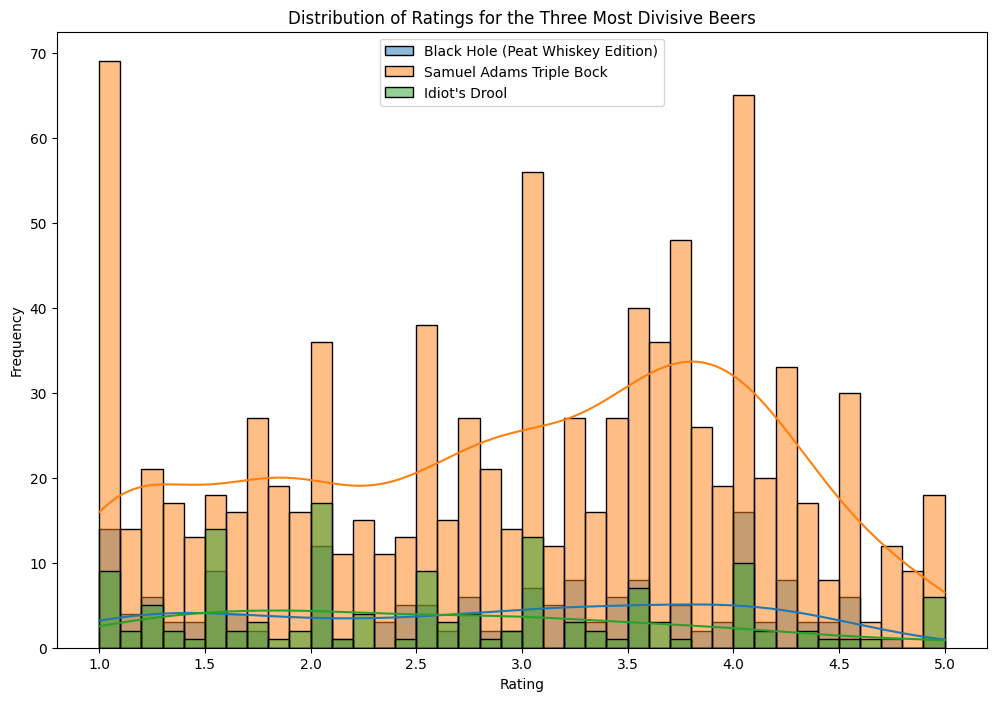

In [43]:
# Get the three most divisive beers
most_divisive_beers = beer_stats.sort_values(by='std_rating', ascending=False).head(3)['beer_name']

# Filter the ratings for these beers
divisive_beer_ratings = ba_ratings_df[ba_ratings_df['beer_name'].isin(most_divisive_beers)]

# Plot the distribution of ratings for each of the three most divisive beers
plt.figure(figsize=(12, 8))
for beer in most_divisive_beers:
    sns.histplot(divisive_beer_ratings[divisive_beer_ratings['beer_name'] == beer]['rating'], kde=True, label=beer, bins=40)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for the Three Most Divisive Beers')
plt.legend()
plt.show()

/var/folders/_b/w9s75zbd5tsf70gz6vs4nshh0000gn/T/ipykernel_17633/793931056.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pbr_ratings['rating'], shade=True)


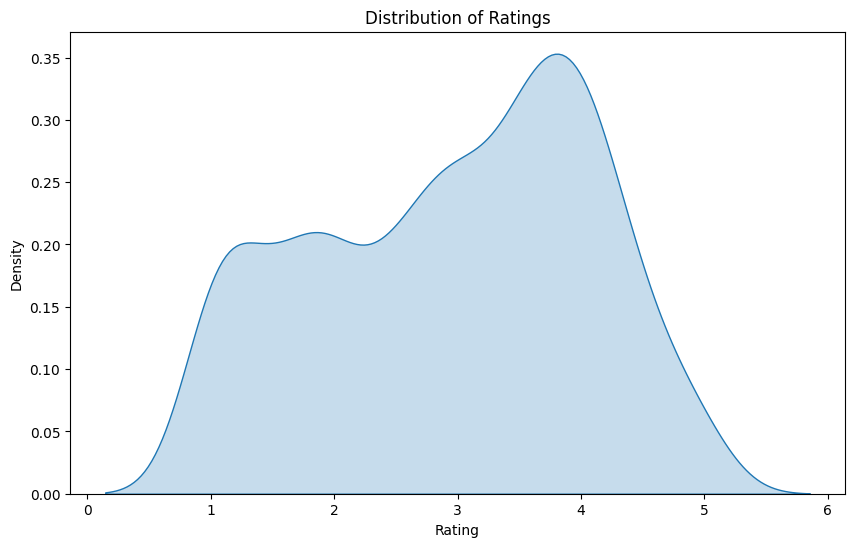

In [112]:
pbr_ratings = ba_ratings_df[ba_ratings_df['beer_id'] == 111]

# Plot the distribution of ratings using a line plot
plt.figure(figsize=(10, 6))
sns.kdeplot(pbr_ratings['rating'], shade=True)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Distribution of Ratings')
plt.show()